<a href="https://colab.research.google.com/github/KoderSamy/Math/blob/main/%D0%9B%D1%802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

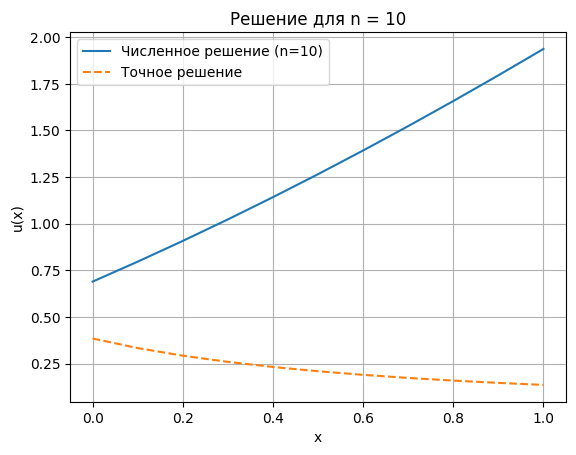

Максимальная погрешность для n=10: 1.8010790099660317


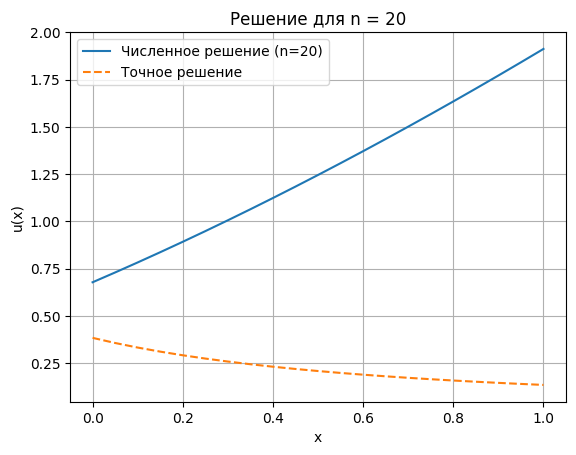

Максимальная погрешность для n=20: 1.775978770465494


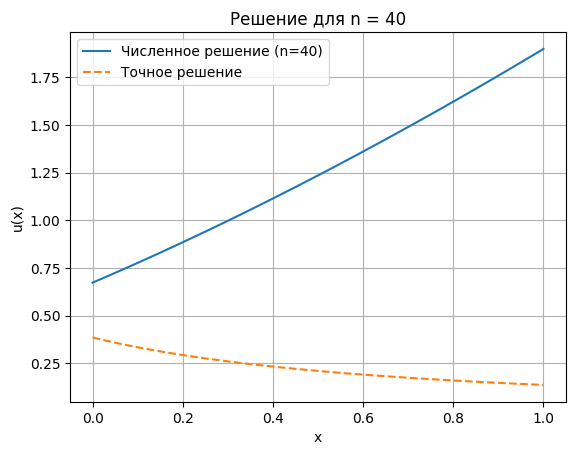

Максимальная погрешность для n=40: 1.7629303934079044


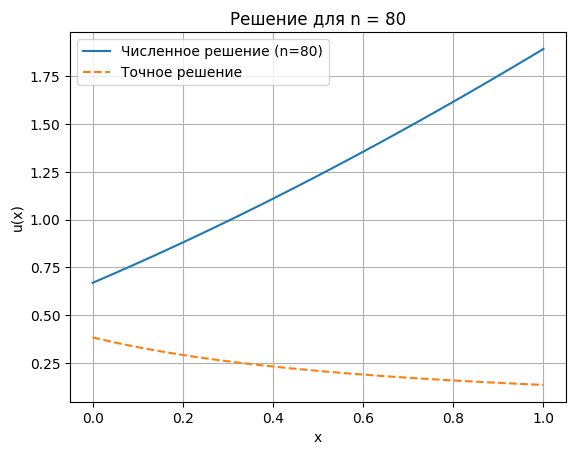

Максимальная погрешность для n=80: 1.756276919490829


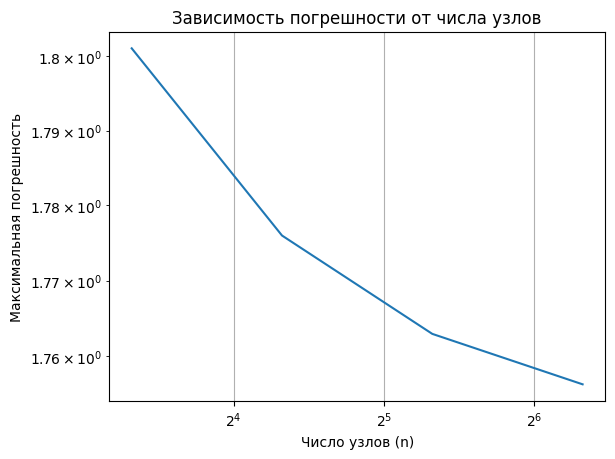

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def solve_bvp(n):
    a = 0
    b = 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    # Формирование матрицы и вектора правой части
    A = np.zeros((n + 1, n + 1))
    f = np.zeros(n + 1)

    # Заполнение матрицы и вектора правой части - краевое условие в 0
    A[0][0] = 3 + 1/h
    A[0][1] = -1/h
    f[0] = 1

    # Заполнение для внутренних точек
    for i in range(1, n):
        p_i = 1.5 / (1 + x[i])
        f_i = 2 / math.sqrt(x[i] + 1)
        A[i][i-1] = 1/h**2 - p_i/(2*h)
        A[i][i] = -2/h**2
        A[i][i+1] = 1/h**2 + p_i/(2*h)
        f[i] = f_i

    # Заполнение матрицы и вектора - краевое условие в 1
    A[n][n-1] = -1/h
    A[n][n] = 1/h
    f[n] = math.sqrt(2)

    # Решение системы
    y = np.linalg.solve(A, f)
    return x, y

# Точное решение
exact_solution = lambda x: 2 / (3*(x + 1))**(3/2)


# Исследование сходимости при разных n
n_values = [10, 20, 40, 80]  # Различные значения числа узлов
errors = []

for n in n_values:
    x, y = solve_bvp(n)
    y_exact = np.array([exact_solution(xi) for xi in x])
    error = np.max(np.abs(y - y_exact))  # Максимальная погрешность
    errors.append(error)

    # Построение графиков для каждого n
    plt.plot(x, y, label=f'Численное решение (n={n})')
    plt.plot(x, y_exact, label='Точное решение', linestyle='--')
    plt.title(f'Решение для n = {n}')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Максимальная погрешность для n={n}: {error}")


# Построение графика зависимости погрешности от n
plt.plot(n_values, errors)
plt.xscale('log', base=2)  # Логарифмическая шкала по оси x
plt.yscale('log')  # Логарифмическая шкала по оси y
plt.xlabel('Число узлов (n)')
plt.ylabel('Максимальная погрешность')
plt.title('Зависимость погрешности от числа узлов')
plt.grid(True)
plt.show()